<a href="https://colab.research.google.com/github/doris-asongafac/Support-Vector-Machines/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup: Run only once per session
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from tqdm.notebook import tqdm
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

# Setup the emotion pipeline (using distilBERT fine-tuned for emotions)
def setup_emotion_detection():
    model_name = "j-hartmann/emotion-english-distilroberta-base"
    emotion_pipeline = pipeline(
        "text-classification",
        model=model_name,
        return_all_scores=True,
        device=0 if torch.cuda.is_available() else -1
    )
    return emotion_pipeline

emotion_pipeline = setup_emotion_detection()


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
# Load uploaded CSV (assume uploaded via Colab file uploader)
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

# Preview dataset
print(df.shape)
df.head()


Saving emotion_analysis_results.csv to emotion_analysis_results (4).csv
(100, 4)


,review,Final Emotion,predicted_emotion,match
0,One of the other reviewers has mentioned that ...,happiness,unknown,False
1,A wonderful little production. <br /><br />The...,happiness,happiness,True
2,I thought this was a wonderful way to spend ti...,happiness,happiness,True
3,Basically there's a family where a little boy ...,disgust,anger,False
4,"Petter Mattei's ""Love in the Time of Money"" is...",happiness,happiness,True


In [ ]:
from transformers import AutoTokenizer

# Load tokenizer for the same model
tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")

# Helper function: tokenize, truncate, decode back to string
def truncate_review(text, max_length=512):
    tokens = tokenizer.encode(text, truncation=True, max_length=max_length)
    return tokenizer.decode(tokens, skip_special_tokens=True)

# Apply truncation before emotion detection
df['truncated_review'] = df['review'].apply(truncate_review)

# Then apply emotion detection
df['predicted_emotion_new'] = df['truncated_review'].progress_apply(lambda x: get_top_emotion(emotion_pipeline(x)[0]))


  0%|          | 0/100 [00:00<?, ?it/s]


Classification Report:

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        15
      digust       0.00      0.00      0.00         4
     disgust       0.55      0.47      0.51        36
        fear       0.00      0.00      0.00         0
   happiness       0.00      0.00      0.00        28
         joy       0.00      0.00      0.00         0
     neutral       0.00      0.00      0.00         0
     sadness       0.11      0.17      0.13         6
     suprise       0.00      0.00      0.00         9
    surprise       0.08      0.50      0.14         2

    accuracy                           0.19       100
   macro avg       0.07      0.11      0.08       100
weighted avg       0.21      0.19      0.19       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

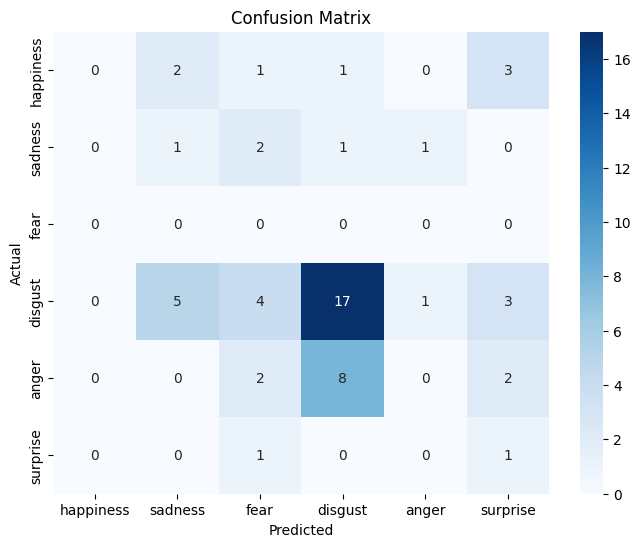

In [ ]:
# Ground truth vs New predictions
print("\nClassification Report:\n")
print(classification_report(df['Final Emotion'], df['predicted_emotion_new']))

# Confusion Matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(df['Final Emotion'], df['predicted_emotion_new'], labels=TARGET_EMOTIONS)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=TARGET_EMOTIONS, yticklabels=TARGET_EMOTIONS, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from tqdm.notebook import tqdm
from transformers import pipeline, AutoTokenizer
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

# Setup the emotion pipeline (using distilBERT fine-tuned for emotions)
def setup_emotion_detection():
    model_name = "j-hartmann/emotion-english-distilroberta-base"
    emotion_pipeline = pipeline(
        "text-classification",
        model=model_name,
        return_all_scores=True,
        device=0 if torch.cuda.is_available() else -1
    )
    return emotion_pipeline

emotion_pipeline = setup_emotion_detection()

# Load uploaded CSV (assume uploaded via Colab file uploader)
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

# Preview dataset
print(df.shape)
df.head()


Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Saving emotion_analysis_results.csv to emotion_analysis_results (5).csv
(100, 4)


,review,Final Emotion,predicted_emotion,match
0,One of the other reviewers has mentioned that ...,happiness,unknown,False
1,A wonderful little production. <br /><br />The...,happiness,happiness,True
2,I thought this was a wonderful way to spend ti...,happiness,happiness,True
3,Basically there's a family where a little boy ...,disgust,anger,False
4,"Petter Mattei's ""Love in the Time of Money"" is...",happiness,happiness,True


In [ ]:
# Load tokenizer for the same model
tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")

# Helper function: tokenize, truncate, decode back to string
def truncate_review(text, max_length=512):
    tokens = tokenizer.encode(text, truncation=True, max_length=max_length)
    return tokenizer.decode(tokens, skip_special_tokens=True)

# Apply truncation before emotion detection
df['truncated_review'] = df['review'].apply(truncate_review)


In [ ]:
# Label mapping (from model labels to your dataset labels)
label_mapping = {
    'joy': 'happiness',
    'sadness': 'sadness',
    'anger': 'anger',
    'disgust': 'disgust',
    'surprise': 'surprise',
    'fear': 'unknown'  # Handle fear as unknown since it's not in the dataset
}

# Function to extract the top emotion label
def get_top_emotion(scores):
    sorted_scores = sorted(scores, key=lambda x: x['score'], reverse=True)
    return sorted_scores[0]['label']

# Apply emotion detection
tqdm.pandas()
df['predicted_emotion_new'] = df['truncated_review'].progress_apply(lambda x: get_top_emotion(emotion_pipeline(x)[0]))

# Map model labels to Final Emotion labels
df['mapped_prediction'] = df['predicted_emotion_new'].map(label_mapping)


  0%|          | 0/100 [00:00<?, ?it/s]


Classification Report:

              precision    recall  f1-score   support

   happiness       0.69      0.39      0.50        28
     sadness       0.11      0.17      0.13         6
       anger       0.00      0.00      0.00        15
     disgust       0.55      0.47      0.51        36
    surprise       0.08      0.50      0.14         2
     unknown       0.00      0.00      0.00         0

   micro avg       0.38      0.34      0.36        87
   macro avg       0.24      0.26      0.21        87
weighted avg       0.46      0.34      0.38        87



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


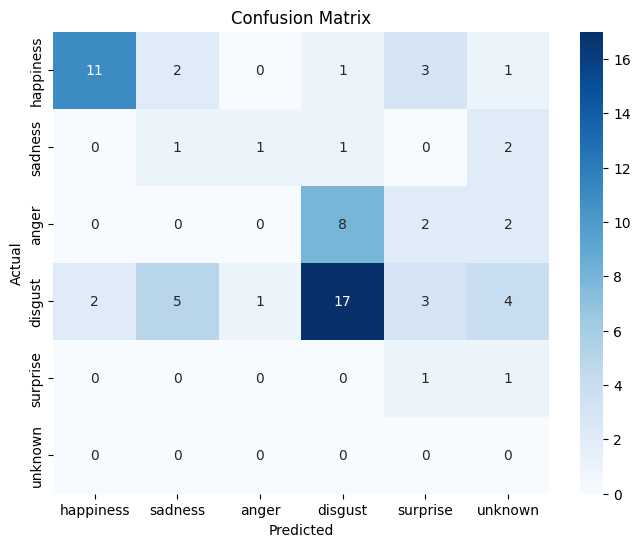

In [ ]:
# Ensure all values are strings
df['Final Emotion'] = df['Final Emotion'].astype(str)
df['mapped_prediction'] = df['mapped_prediction'].astype(str)

# Drop any rows with missing mapped predictions (i.e., NaN due to unmapped labels)
df_clean = df.dropna(subset=['mapped_prediction'])

# Define the target emotions explicitly
TARGET_EMOTIONS = ['happiness', 'sadness', 'anger', 'disgust', 'surprise', 'unknown']

# Classification report
print("\nClassification Report:\n")
print(classification_report(df_clean['Final Emotion'], df_clean['mapped_prediction'], labels=TARGET_EMOTIONS))

# Confusion Matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(df_clean['Final Emotion'], df_clean['mapped_prediction'], labels=TARGET_EMOTIONS)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=TARGET_EMOTIONS, yticklabels=TARGET_EMOTIONS, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

